## Data Structure Overview

The cleaned dataset contains 40,248 observations and 8 variables, representing demographic and economic information across U.S. states over multiple years.

### Variable Composition

- 3 categorical variables 
    - State_name (52 unique states/regions)
    - Age_label (86 detailed age categories)
    - Age_group (8 broader age group categories)
- 5 numerical variables
    - State_code
    - Year
    - Population
    - Sex
    - Median_household_income

In [2]:
# ===============================
# Step 1: Import libraries
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Better plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# ===============================
# Step 2: Load data set
# ===============================

df = pd.read_csv("Cleaned_merged_dataset.csv")

# View first few rows
df.head(10)


,State_name,State_code,Year,Population,Sex,Median_household_income,Age_label,Age_group
0,Alabama,1,2021,5050380,0,53913.0,All ages,All ages
1,Alabama,1,2022,5073903,0,59674.0,All ages,All ages
2,Alabama,1,2023,5108468,0,62212.0,All ages,All ages
3,Alabama,1,2021,57503,0,53913.0,1,0-18
4,Alabama,1,2022,57244,0,59674.0,1,0-18
5,Alabama,1,2023,58419,0,62212.0,1,0-18
6,Alabama,1,2021,58637,0,53913.0,2,0-18
7,Alabama,1,2022,58117,0,59674.0,2,0-18
8,Alabama,1,2023,58006,0,62212.0,2,0-18
9,Alabama,1,2021,60349,0,53913.0,3,0-18


In [3]:
# Shape of data set
print("Dataset shape:", df.shape)

# Data types
df.info()

# Check unique values for categorical variables
for col in df.select_dtypes(include="object").columns:
    print(f"\nUnique values in {col}:")
    print(df[col].nunique())


Dataset shape: (40248, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40248 entries, 0 to 40247
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State_name               40248 non-null  object 
 1   State_code               40248 non-null  int64  
 2   Year                     40248 non-null  int64  
 3   Population               40248 non-null  int64  
 4   Sex                      40248 non-null  int64  
 5   Median_household_income  40248 non-null  float64
 6   Age_label                40248 non-null  object 
 7   Age_group                40248 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 2.5+ MB

Unique values in State_name:
52

Unique values in Age_label:
86

Unique values in Age_group:
8


In [4]:
for col in df.select_dtypes(include="int64").columns:
    print(f"\nUnique values in {col}:")
    print(df[col].nunique())


Unique values in State_code:
52

Unique values in Year:
3

Unique values in Population:
32184

Unique values in Sex:
3


## Summary Statistics

### Topic 1: Income Distribution and Inequality

In [5]:
import pandas as pd
import numpy as np

income_df = df[df["Age_group"] == "All ages"].copy()

desc = income_df["Median_household_income"].describe()

cv = desc["std"] / desc["mean"]
iqr = desc["75%"] - desc["25%"]
range_val = desc["max"] - desc["min"]

# summary table
summary_table = pd.DataFrame({
    "Metric": [
        "Count",
        "Mean",
        "Standard Deviation",
        "Minimum",
        "25th Percentile",
        "Median",
        "75th Percentile",
        "Maximum",
        "Range",
        "Interquartile Range (IQR)",
        "Coefficient of Variation (CV)"
    ],
    "Value": [
        desc["count"],
        desc["mean"],
        desc["std"],
        desc["min"],
        desc["25%"],
        desc["50%"],
        desc["75%"],
        desc["max"],
        range_val,
        iqr,
        cv
    ]
})

summary_table


,Metric,Value
0,Count,468.000000
1,Mean,72802.288462
2,Standard Deviation,14203.555681
3,Minimum,22237.000000
4,25th Percentile,64800.000000
5,Median,71680.000000
6,75th Percentile,82194.000000
7,Maximum,108210.000000
8,Range,85973.000000
9,Interquartile Range (IQR),17394.000000


## Summary of Household Income Distribution Across States

- **Mean vs. Median**

  The mean median household income is **$72,802**,

  closely aligned with the median value of **$71,680**.

  This suggests a **relatively symmetric distribution**, with no extreme distortion from outliers.

- **Dispersion**

  - Standard deviation: **$14,203**

  - Coefficient of variation: **19.5%**
 
  These figures indicate **moderate income dispersion** across states. While meaningful differences exist, the inequality is not excessively polarized.

- **Range and Extremes**

  The income range spans from **$22,237**

  to **$108,210**, highlighting **substantial disparities** between the lowest- and highest-income states.

- **Interquartile Range (IQR)**

  An IQR of **$17,394** shows that the **middle 50% of states are clustered within a narrower band**, implying that extreme states contribute disproportionately to the overall variation.


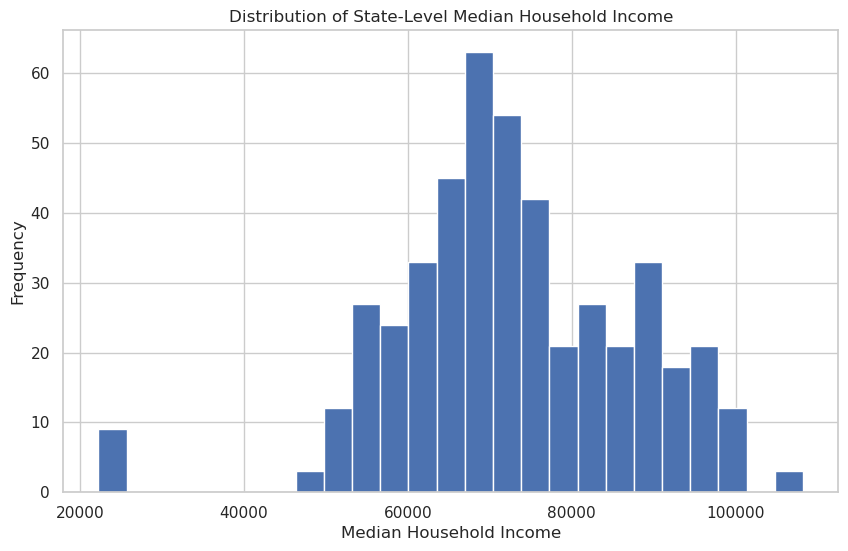

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(income_df["Median_household_income"], bins=25)
plt.title("Distribution of State-Level Median Household Income")
plt.xlabel("Median Household Income")
plt.ylabel("Frequency")
plt.show()


### Income Distribution Shape Analysis

The histogram illustrates a mildly left-skewed income distribution. While most states cluster between $60,000–$85,000, a small number of lower-income states extend the left tail toward $20,000–$40,000.

This visual pattern is consistent with the negative skewness value (−0.379), indicating that the distribution is slightly influenced by lower-income outliers. However, the overall shape remains relatively symmetric, as evidenced by the close proximity of the mean $72,802 and median $71,680.

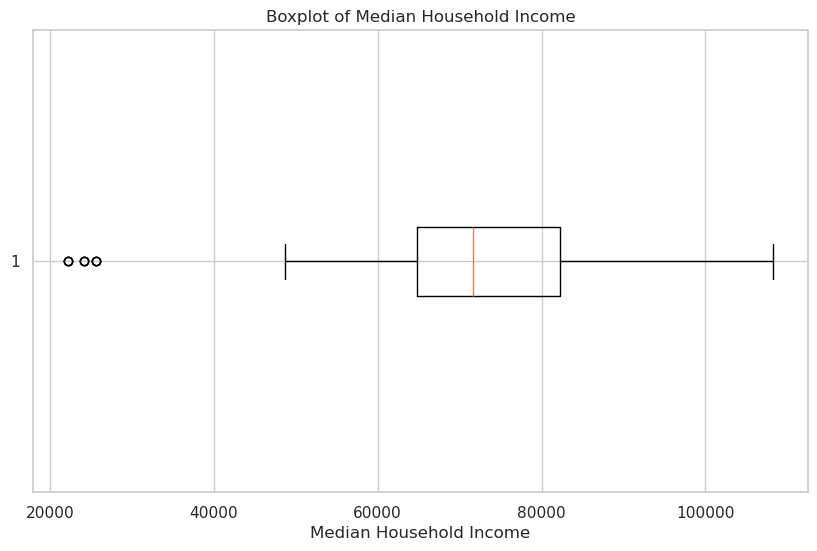

In [7]:
plt.figure()
plt.boxplot(income_df["Median_household_income"], vert=False)
plt.title("Boxplot of Median Household Income")
plt.xlabel("Median Household Income")
plt.show()


### Income Boxplot Analysis

The boxplot of median household income reveals a moderately dispersed distribution with several notable low-income outliers. The median income lies near the center of the interquartile range, indicating a relatively balanced distribution among the middle 50% of state-year observations.

The left whisker extends further and is accompanied by a small number of distinct low-income outliers around the $20,000–$30,000 range. This visual pattern suggests that a few economically disadvantaged states contribute to a longer left tail in the income distribution.

In contrast, the right tail does not exhibit extreme high-income outliers, implying that overall income inequality is not driven by exceptionally wealthy states. This observation is consistent with the negative skewness (−0.379) and supports the conclusion that the income distribution is mildly left-skewed rather than heavily polarized.


<Axes: xlabel='Year'>

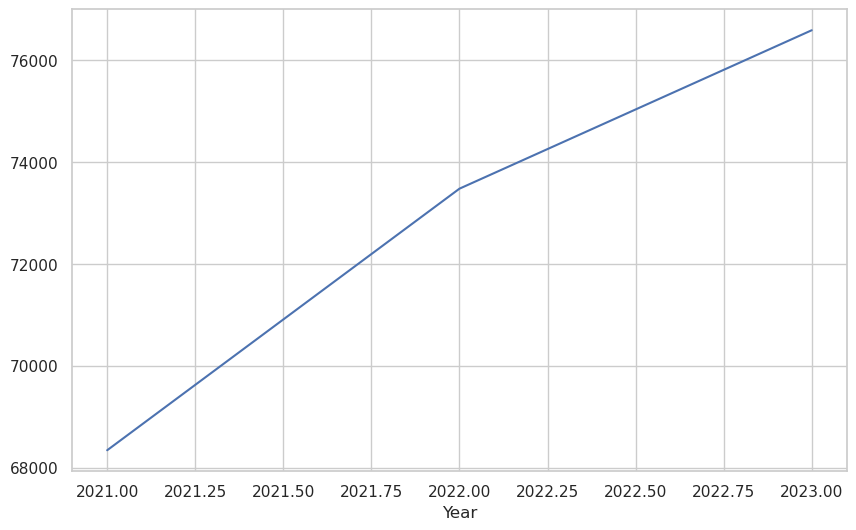

In [8]:
year_income = income_df.groupby("Year")["Median_household_income"].mean()

growth_rate = year_income.pct_change().mean()

year_income.plot()


### Trend in Median Household Income Over Time

The line plot shows a clear upward trend in median household income from 2021 to 2023.  
Income increases steadily across the three years, rising from approximately **$68,000** in 2021 to about **$76,500** in 2023.

The largest year-over-year increase occurs between **2021 and 2022**, suggesting a relatively rapid income growth during this period.  

From **2022 to 2023**, income continues to rise but at a slightly slower pace, indicating a moderation in growth rather than a reversal.

Overall, the consistent upward trajectory suggests sustained improvement in household income levels over time, with no evidence of short-term declines or volatility during the observed period.


## Relationship of State Size to Income

In [11]:
state_level = income_df.groupby("State_name").agg({
    "Median_household_income": "mean",
    "Population": "mean"
})

state_level.corr()

,Median_household_income,Population
Median_household_income,1.000000,0.135451
Population,0.135451,1.000000


The correlation between state population and median household income is 0.135, indicating a weak positive linear association. While larger states tend to have slightly higher incomes, the magnitude is small, suggesting that population size alone does not meaningfully explain income differences across states.

In [12]:
income_df["Median_household_income"].skew()


-0.3790292861711356

The skewness of −0.379 indicates a mild left-skew in the income distribution. This suggests the presence of a small number of relatively low-income states that extend the lower tail of the distribution.

However, the magnitude of skewness is moderate, implying that the distribution remains largely balanced and not heavily distorted by extreme outliers.

The moderate negative skew further confirms that the overall inequality is not driven by extreme high-income states but rather by a limited number of lower-income observations.
